In [10]:
%load_ext watermark
%watermark -v -p numpy,scipy,sklearn,pandas,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.12
IPython version      : 7.33.0

numpy     : 1.21.6
scipy     : 1.7.3
sklearn   : 1.0.2
pandas    : 1.3.4
matplotlib: 3.5.2



In [11]:
import numpy as np
import os
import seaborn as sns
import sklearn

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# DATA 불러오기

In [12]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment',  None)

PROJECT_ROOT_DIR = './..'
DATA_DIR = 'data'
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, DATA_DIR, )

def load_user_data(data_path = DATA_PATH):
    train_csv_path = os.path.join(data_path, 'train.csv')
    test_csv_path = os.path.join(data_path, 'test.csv')
    return pd.read_csv(train_csv_path), pd.read_csv(test_csv_path)

train, test = load_user_data(DATA_PATH)

# DATA 확인

In [4]:
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   object 
 3   Marital_Status       1108 non-null   object 
 4   Income               1108 non-null   float64
 5   Kidhome              1108 non-null   int64  
 6   Teenhome             1108 non-null   int64  
 7   Dt_Customer          1108 non-null   object 
 8   Recency              1108 non-null   int64  
 9   NumDealsPurchases    1108 non-null   int64  
 10  NumWebPurchases      1108 non-null   int64  
 11  NumCatalogPurchases  1108 non-null   int64  
 12  NumStorePurchases    1108 non-null   int64  
 13  NumWebVisitsMonth    1108 non-null   int64  
 14  AcceptedCmp3         1108 non-null   int64  
 15  AcceptedCmp4         1108 non-null   i

결측치 없음
Education(학력), Marital_Status(결혼 상태), Dt_Customer(가입일)은 문자형
AcceptedCmp1 ~ 5, Response는 0 또는 1로 나타나는 bool형


In [6]:
train['Education'].value_counts()

Graduation    570
PhD           254
Master        173
2n Cycle       89
Basic          22
Name: Education, dtype: int64

In [7]:
train['Marital_Status'].value_counts()

Married     415
Together    296
Single      234
Divorced    120
Widow        39
Alone         2
YOLO          1
Absurd        1
Name: Marital_Status, dtype: int64

In [ ]:
train['Dt_Customer'].value_counts()

In [ ]:
train.describe()

# 시각화

In [64]:
categorical = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome',
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
               'Complain', 'Response']

quantitative = ['Year_Birth', 'Income', 'year',	'month', 'day', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

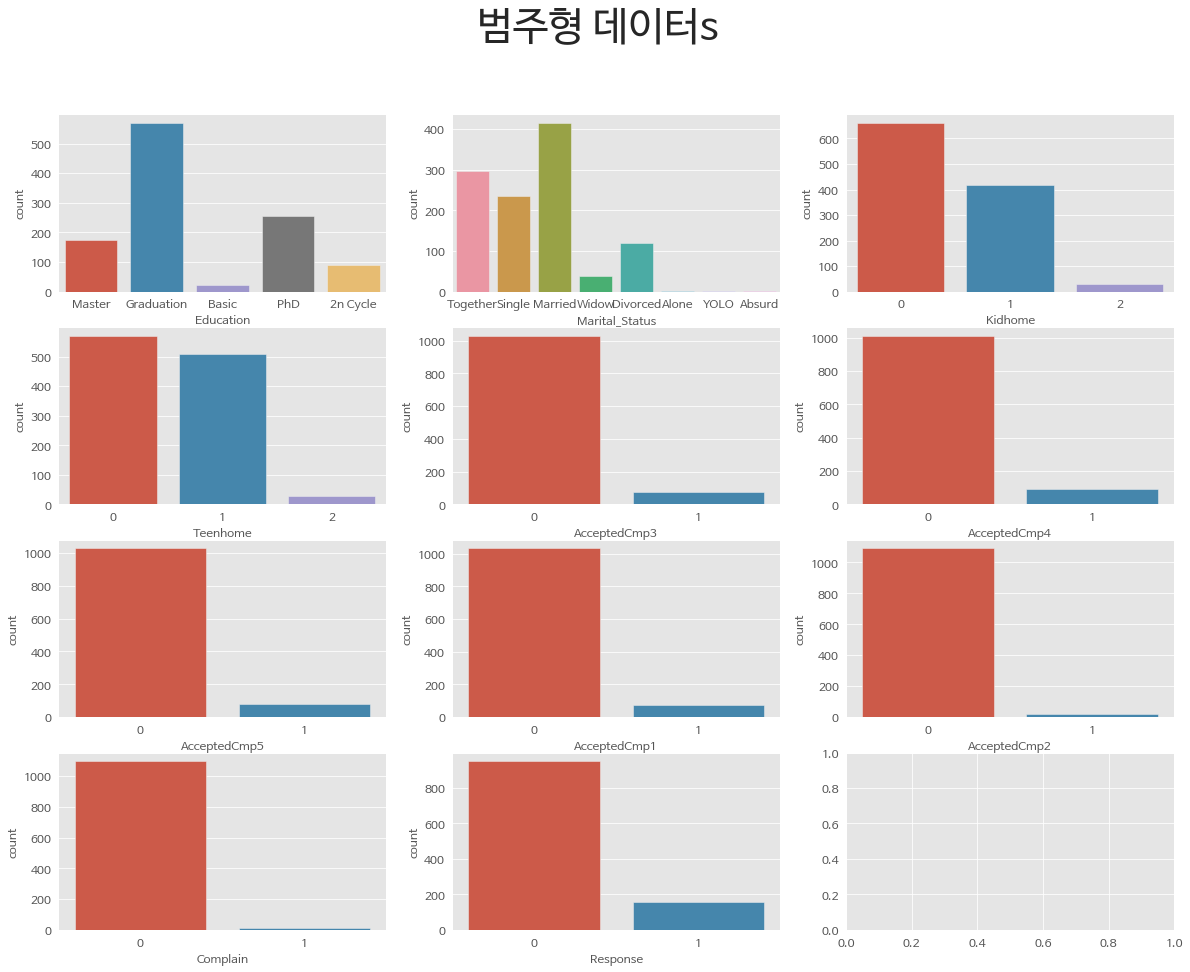

In [65]:
fig, axes = plt.subplots(4, 3, figsize=(20,15))
fig.suptitle('범주형 데이터s', fontsize=40)

for ax, feature in zip(axes.flatten(), categorical):
    sns.countplot(data = train , x = feature, ax=ax)
plt.show()

ValueError: Could not interpret value `year` for parameter `x`

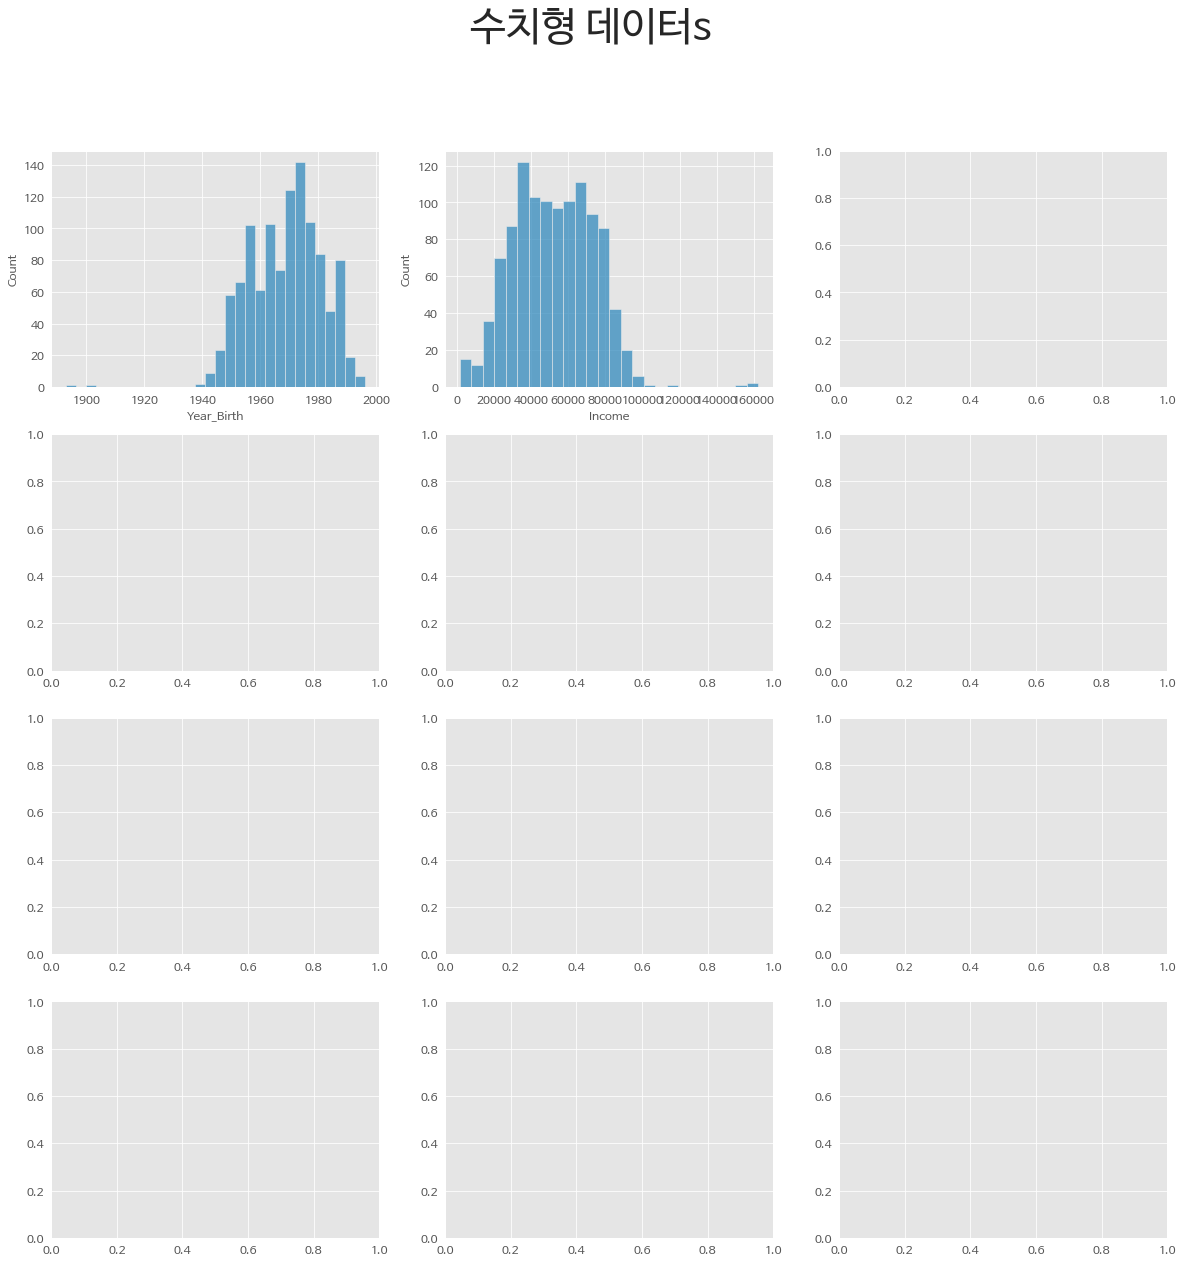

In [66]:
fig, axes = plt.subplots(4, 3, figsize=(20,20))
fig.suptitle('수치형 데이터s', fontsize=40)
#plt.tight_layout()

for ax,feature in zip(axes.flatten(),quantitative):
    sns.histplot(data = train, x = feature, ax=ax)
plt.show()

Year_Birth와 Income은 정규화를 해야하는게 아닌지? -> 치우쳐 있음
Year_Birth, Income, NumDealsPurchases, NumWebPurchases, NumWebVisitsMonth에서 이상치 의심

In [68]:
from sklearn.preprocessing import MinMaxScaler

train_corr = train[quantitative + ['target']]
scaler= MinMaxScaler()
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('수치형 데이터들의 상관관계', fontsize=30)

KeyError: "['year', 'month', 'day'] not in index"

target과 연관성이 높아보이는 Income, NumWebPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases에 주목.

In [67]:
from pandas.plotting import scatter_matrix

attr = ['Income', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'target']
scatter_matrix(train_corr[attr], figsize=(15, 10))

NameError: name 'train_corr' is not defined

# 테스트 데이터, 검증 데이터 분리

In [13]:
from sklearn.model_selection import train_test_split

data = train.drop('id', axis = 1).copy()
train_data, val_data = train_test_split(data, test_size=0.3)
train_data.reset_index(inplace=True)
val_data.reset_index(inplace=True)

In [14]:
print('학습시킬 train 셋 : ', train_data.shape)
print('검증할 val 셋 : ', val_data.shape)

학습시킬 train 셋 :  (775, 22)
검증할 val 셋 :  (333, 22)


In [25]:
train_X = train_data.drop(['target', 'index'], axis = 1)
train_y = train_data.target

val_X = val_data.drop(['target', 'index'], axis = 1)
val_y = val_data.target

# 전처리

### Dt_Customer -> year, month, day

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

class DtCustomerSplitter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        year, month, day = list(), list(), list()
        for date in X.Dt_Customer:
            da, mo, ye = date.split('-')
            year.append(int(ye))
            month.append(int(mo))
            day.append(int(da))
        X['year']  = year
        X['month'] = month
        X['day']   = day
        return X.drop('Dt_Customer', axis=1)

# 파이프라인에 넣기

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

num_attribs = list(train_X.drop(['Marital_Status', 'Education'], axis=1))
onehot_attribs = ['Marital_Status']
ordinal_attribs = ['Education']
ms_cat = [['Married','Together','Single','Divorced','Widow','Alone','YOLO','Absurd']]
edu_cat = [['PhD','Master','Graduation','2n Cycle','Basic']]

my_pipeline = ColumnTransformer([
    ('Dt_Customer_Splitter', DtCustomerSplitter(), num_attribs),
    ('OneHotEncoder', OneHotEncoder(categories=ms_cat, sparse=False), onehot_attribs),
    ('OrdinalEncoder', OrdinalEncoder(categories=edu_cat), ordinal_attribs)
])

train_X_prepared = my_pipeline.fit_transform(train_X)
val_X_prepared = my_pipeline.fit_transform(val_X)

# 선형 회귀 갈기기

In [63]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_X_prepared, train_y)

LinearRegression()

In [47]:
y_predictions = lin_reg.predict(val_X_prepared)

In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error

def nmae(true, pred):

    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))

    return score

print(f'모델 NMAE: {nmae(val_y,y_predictions)}')

모델 NMAE: 0.2858683178302671


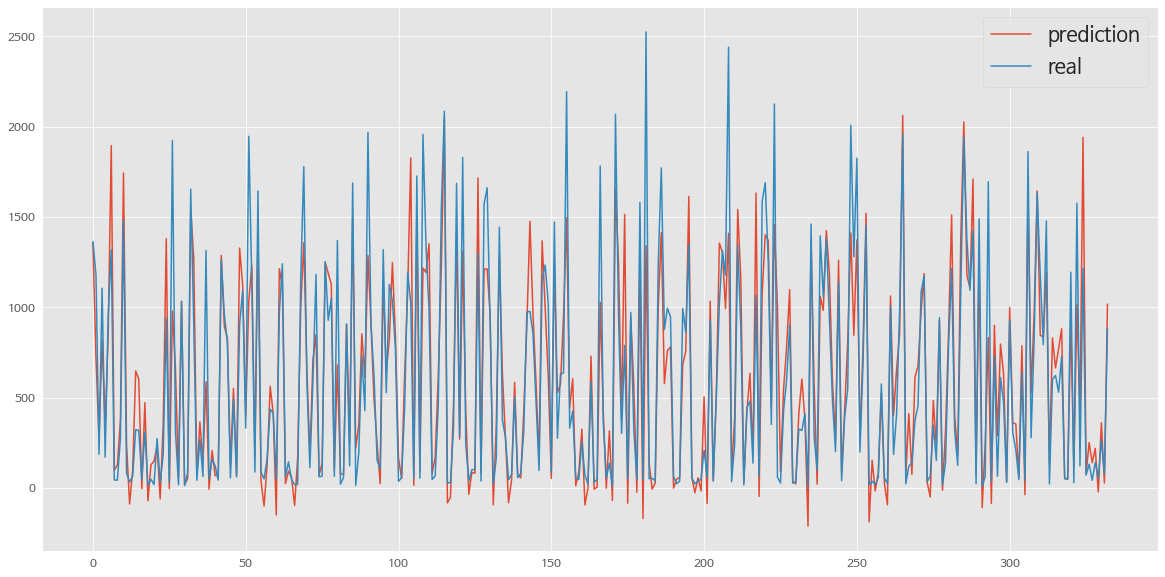

In [49]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_predictions, label = 'prediction')
plt.plot(val_y, label = 'real')
plt.legend(fontsize = 20)
plt.show()

# Decision Tree 갈기기

In [51]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_X_prepared, train_y)

DecisionTreeRegressor()

In [58]:
y_predictions = tree_reg.predict(val_X_prepared)

In [60]:
print(f'모델 NMAE: {nmae(val_y,y_predictions)}')

모델 NMAE: 0.22798411586078018


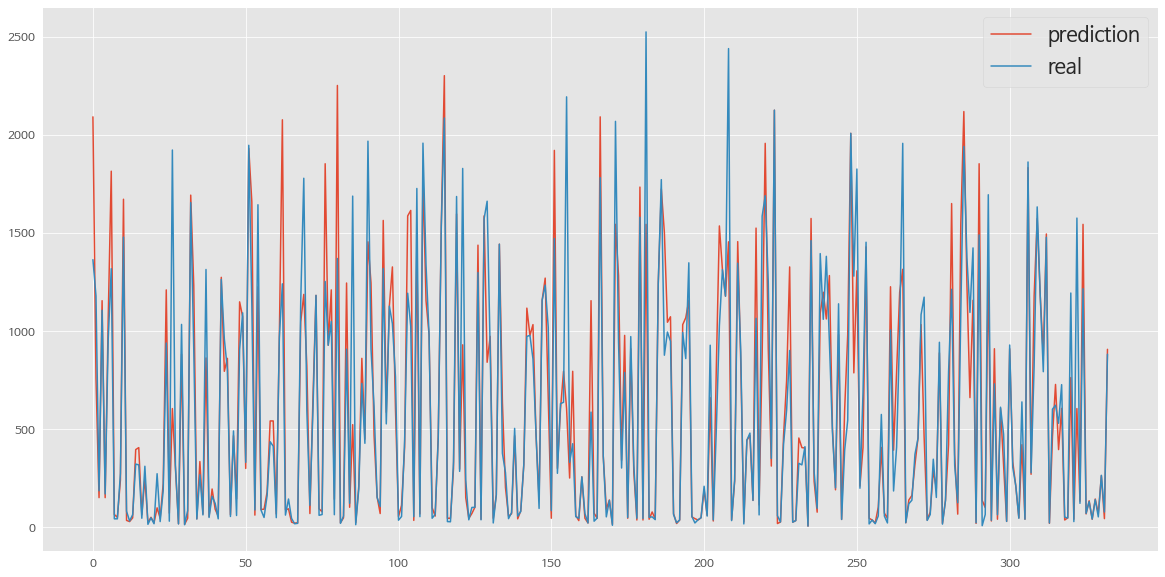

In [61]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_predictions, label = 'prediction')
plt.plot(val_y, label = 'real')
plt.legend(fontsize = 20)
plt.show()

In [84]:
data = test.drop('id', axis = 1).copy()
X = data

pandas.core.frame.DataFrame

In [85]:
num_attribs = list(X.drop(['Marital_Status', 'Education'], axis=1))
onehot_attribs = ['Marital_Status']
ordinal_attribs = ['Education']
ms_cat = [['Married','Together','Single','Divorced','Widow','Alone','YOLO','Absurd']]
edu_cat = [['PhD','Master','Graduation','2n Cycle','Basic']]

my_pipeline = ColumnTransformer([
    ('Dt_Customer_Splitter', DtCustomerSplitter(), num_attribs),
    ('OneHotEncoder', OneHotEncoder(categories=ms_cat, sparse=False), onehot_attribs),
    ('OrdinalEncoder', OrdinalEncoder(categories=edu_cat), ordinal_attribs)
])

X_prepared = my_pipeline.fit_transform(X)

In [87]:
X_prepared

array([[1.9790e+03, 5.7537e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [1.9550e+03, 6.5748e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [1.9840e+03, 5.5434e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       ...,
       [1.9890e+03, 3.3996e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9700e+03, 7.4854e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [1.9750e+03, 4.6098e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [89]:
y_predictions = tree_reg.predict(X_prepared)

In [91]:
y_predictions

array([ 521., 1005.,  907., ...,   71., 1073.,  120.])

In [90]:
submission = pd.read_csv('../data/sample_submission.csv')
submission.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [92]:
submission['target'] = y_predictions
submission.to_csv("submission_baseline1.csv", index=False)